# Kütüphaneler

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

# Veri indirme

In [9]:
df = pd.read_csv("/kaggle/input/usarrests/USArrests.csv").copy()
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [11]:
df.index = df.iloc[:,0] #index atama
df = df.iloc[:,1:5]
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [15]:
(df.isnull().sum() / df.shape[0]) * 100


Murder      0.0
Assault     0.0
UrbanPop    0.0
Rape        0.0
dtype: float64

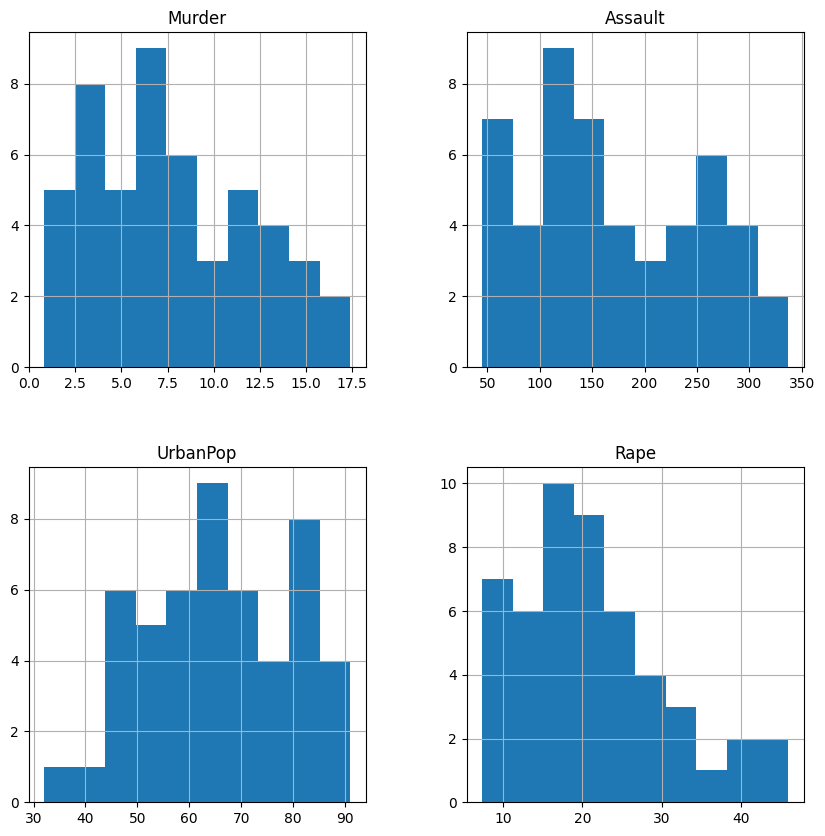

In [16]:
df.hist(figsize = (10,10));

## K-MEANS Model ve Görselleştirme

#### Amaç gözlemleri birbirlerine olan benzerliklerine göre kümelere ayırmaktır
#### Hedef kümeleri kendi aralarında heterojen kendi içinde homojen olmazını sağlamak

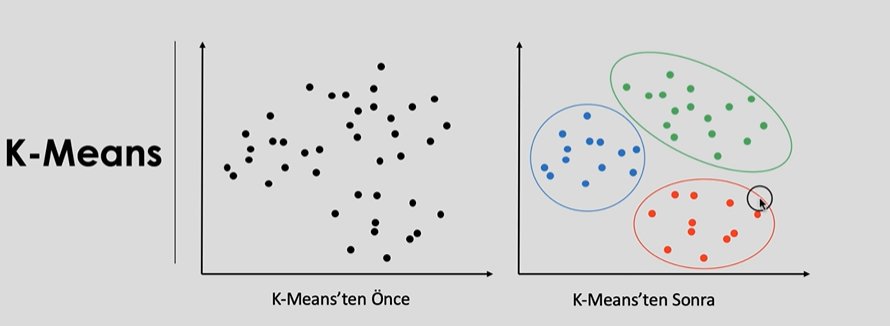

1. Piksellere Ayırma: Fotoğrafı, her biri kırmızı, yeşil ve mavi (RGB) değerleriyle temsil edilen piksellere ayırın.

2. Küme Sayısı Seçimi: Fotoğrafınızdaki nesneleri veya bölgeleri kaç kategoriye ayıracağınızı belirleyin.

3. Rastgele Merkez Seçimi: Seçtiğiniz küme sayısı kadar rastgele küme merkezi seçin. Her merkez, RGB renk uzayındaki bir noktayla temsil edilir.

4. Uzaklık Hesaplama: Her pikselin her bir küme merkezine olan uzaklığını hesaplayın. En yaygın kullanılan uzaklık ölçümlerinden biri Öklid uzaklığıdır.

5. Atama: Her pikseli kendisine en yakın küme merkezine atayın.

6. Merkez Güncelleme: Her bir kümenin ortalamasını hesaplayarak küme merkezlerini güncelleyin.

7. Tekrarlama: 4, 5 ve 6. adımları birkaç kez tekrarlayın. Küme içi hata kareler toplamlarının toplamının (total within-cluster variation) minimum olduğu duruma ulaştığında işlemi durdurun.

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans

KMeans(n_clusters=4)

In [19]:
?kmeans

Type:        KMeans
String form: KMeans(n_clusters=4)
File:        /opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py
Docstring:  
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centroids using sampling based on
    an empirical probability distribution of the points' contribution to the
    overall inertia. This technique speeds up convergence. The algorithm
    implemented is "greedy k-means++". It differs from the vanilla k-means++
    by making several trials at each sampling step and choosing the best centroid
    among them.

    'random': choose `n_clusters` observations (rows) at random from data
    for the init

In [22]:
k_fit = kmeans.fit(df)
print("küme sayısı:", k_fit.n_clusters)
print("--"*40)
print("küme merkezleri:", k_fit.cluster_centers_)
print("--"*40)
print("küme etiketleri:", k_fit.labels_)

küme sayısı: 4
--------------------------------------------------------------------------------
küme merkezleri: [[  5.59       112.4         65.6         17.27      ]
 [ 11.8125     272.5625      68.3125      28.375     ]
 [  8.21428571 173.28571429  70.64285714  22.84285714]
 [  2.95        62.7         53.9         11.51      ]]
--------------------------------------------------------------------------------
küme etiketleri: [1 1 1 2 1 2 0 1 1 2 3 0 1 0 3 0 0 1 3 1 2 1 3 1 2 0 0 1 3 2 1 1 1 3 0 2 2
 0 2 1 3 2 2 0 3 2 2 3 3 2]


# Görsellestirme

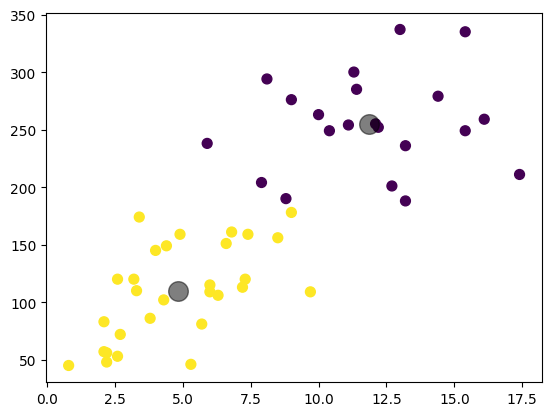

In [24]:
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(df)

kumeler = k_fit.labels_

plt.scatter(df.iloc[:,0], df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")
merkezler = k_fit.cluster_centers_
plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);

In [31]:
#!pip install --upgrade matplotlib
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D

In [32]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_
merkezler = kmeans.cluster_centers_
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2])
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=kumeler)
ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 2], 
           marker='*', 
           c='#050505', 
           s=1000);

<Figure size 1600x900 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

## kumeler ve gözlem birimleri

In [33]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": kumeler})[0:10]

,Eyaletler,Kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,1
7,Delaware,0
8,Florida,0
9,Georgia,2


In [34]:
df["kume_no"] = kumeler
df["kume_no"] = df["kume_no"] + 1
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Unnamed: 0,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,1


## Optimum Kume Sayısının Belirlenmesi

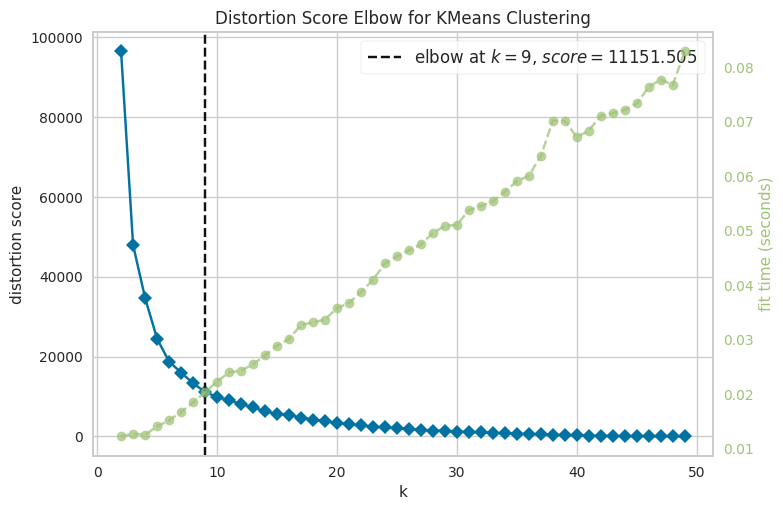

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50))
visualizer.fit(df) 
visualizer.poof()  

In [37]:
kmeans = KMeans(n_clusters = 4)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": kumeler})[0:10]

,Eyaletler,Kumeler
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,0
4,California,1
5,Colorado,0
6,Connecticut,2
7,Delaware,1
8,Florida,1
9,Georgia,0


# Hiyerarşik Kümeleme

#### Amaç gözlemleri birbirlerine olan benzerliklerine göre alt kümelere ayırmaktır

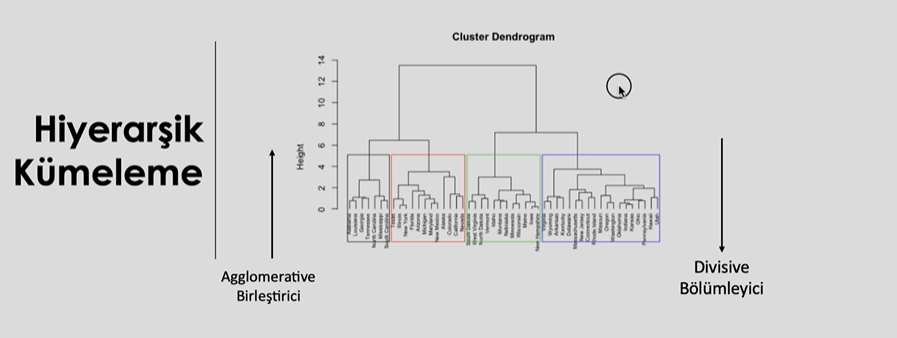

Adım 1: Veri setinde birbirine en yakın olan iki gölge bulunur.

Adım 2: Bu iki nokta bir araya getirilerek yeni bir gölge oluşturulur. Yani artık veri seti ilk birleşimdeki gözlemlerden oluşmaktadır.

Adım 3: Aynı işlem tekrarlanarak kadar yukarı doğru çıkılır. Yani iki kümenin birleşiminden oluşan bu yeni kümeler aynı şekilde birbirlerine benzerliklerine göre tekrar birleştirilir. Bu işlem tüm gözlemler tek bir küme de toplanana kadar bu işlemler tekrar edilir.

Birbirine yakın noktalar uzaklık ölçüleri kullanarak belirlenir. Öklit uzaklığı, manhattan uzaklığı, korelasyon vs.

### Hiyerarşik VS Hiyerarşik Olmayan VS Karar Ağaçları
Hiyerarşik kümeleme yöntemlerinde veri seti gözlemler ya da değişkenler bazında kümeleme işlemine sokulabilirken hiyerarşik olmayan yöntemlerde sadece gözlemlerin kümelenmesi mümkündür.

Karar ağaçlarından farkı; karar ağaçlarında ayırma işlemi hedef değişkene göre yapılırken burada bağımlı değişken olmadığı için gözlemler bağımsız değişkenler üzerinden yapılan uzaklık hesaplarına göre kümelere ayrılır.


In [41]:
df = pd.read_csv("/kaggle/input/usarrests/USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
#df.index.name = None
df.head()


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


## Metotlar

In [42]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")

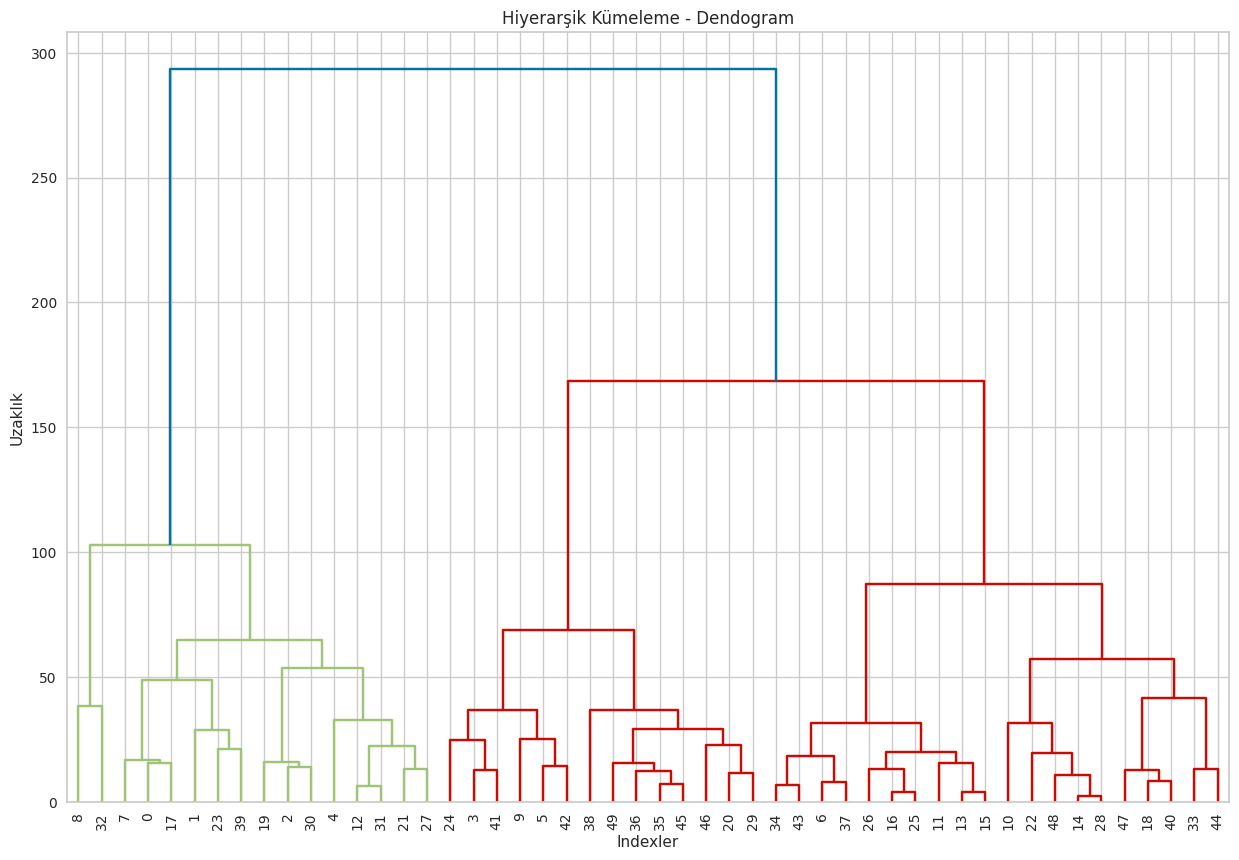

In [43]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    leaf_font_size=10
);

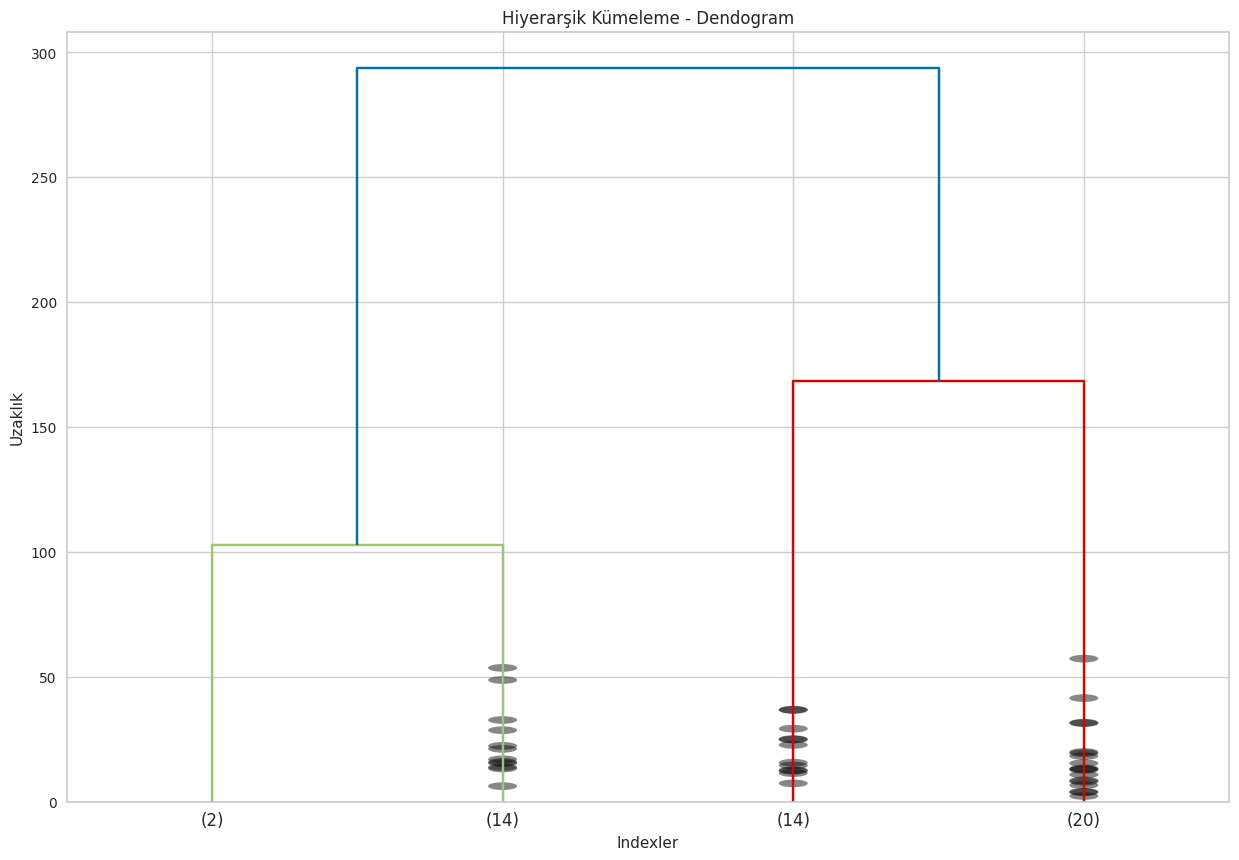

In [45]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    truncate_mode = "lastp",
    p = 4, # burda 4 küme olması istenilmiş
    show_contracted = True
);

## Optimum Küme Sayısı

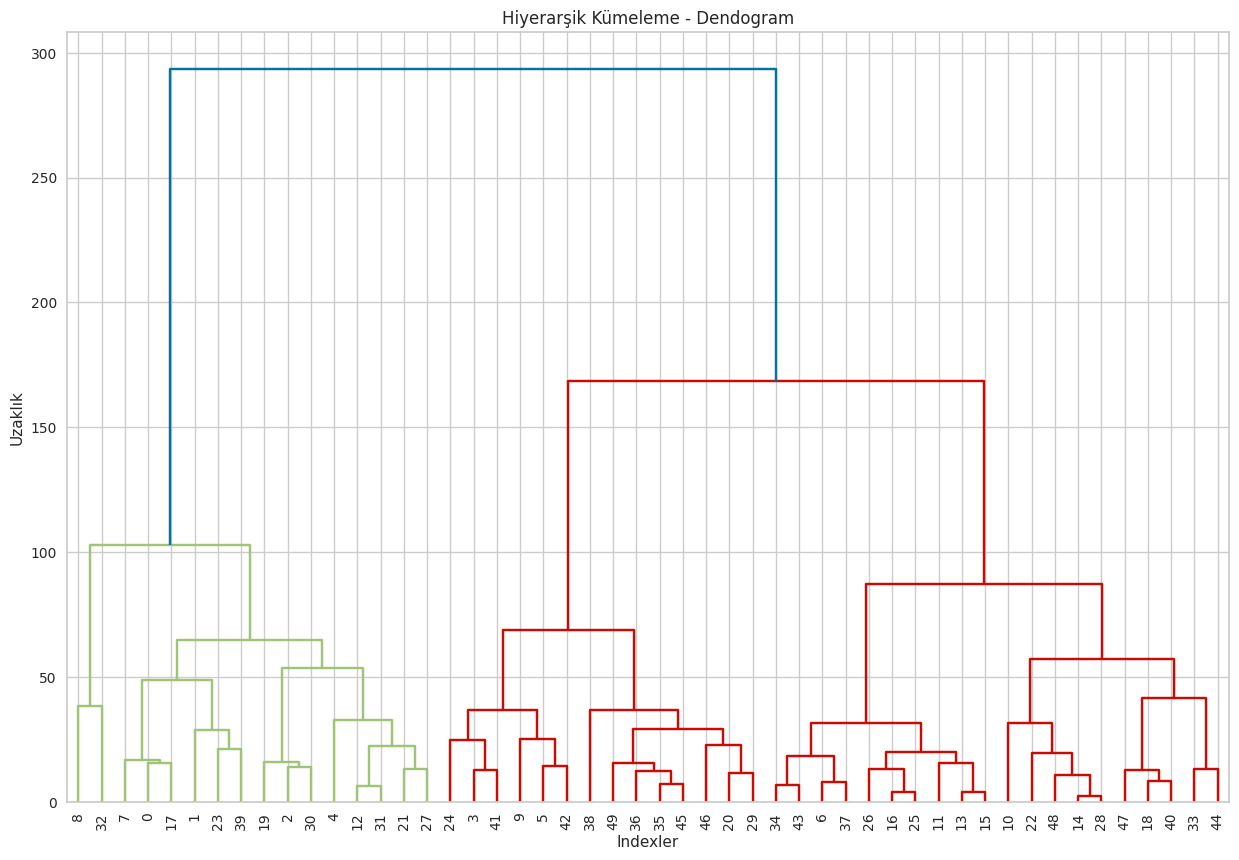

In [46]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
den = dendrogram(
    hc_complete,
    leaf_font_size=10
);

In [47]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4, 
                                  affinity = "euclidean", 
                                  linkage = "ward")

cluster.fit_predict(df)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2])

In [48]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": cluster.fit_predict(df)})[0:10]

,Eyaletler,Kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,3
7,Delaware,0
8,Florida,0
9,Georgia,2


In [49]:
df["kume_no"] = cluster.fit_predict(df)
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0


# PCA

#### Temel fikir, çok değişkenli verinin ana özelliklerini daha az sayıda değişken/bileşen ile temsil etmektir.
#### Diğer bir ifade ile: küçük miktarda bir bilgi kaybını göze alıp değişken boyutunu azaltmaktır.

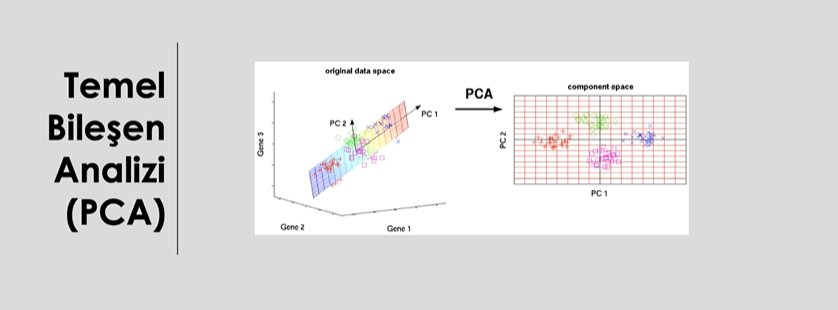

In [51]:
df = pd.read_csv("/kaggle/input/usarrests/USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
# df.index.name = None
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


## standartlaştırmak 

In [52]:
from sklearn.preprocessing import StandardScaler
df = StandardScaler().fit_transform(df)
df[0:5,0:5]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca_fit = pca.fit_transform(df)
bilesen_df = pd.DataFrame(data = pca_fit, 
                          columns = ["birinci_bilesen","ikinci_bilesen","ucuncu_bilesen"])
bilesen_df.head()

,birinci_bilesen,ikinci_bilesen,ucuncu_bilesen
0,0.985566,1.133392,-0.444269
1,1.950138,1.073213,2.040003
2,1.763164,-0.745957,0.054781
3,-0.141420,1.119797,0.114574
4,2.523980,-1.542934,0.598557


In [54]:
pca.explained_variance_ratio_ 

array([0.62006039, 0.24744129, 0.0891408 ])

 veriyi %96 açıklamaktadır

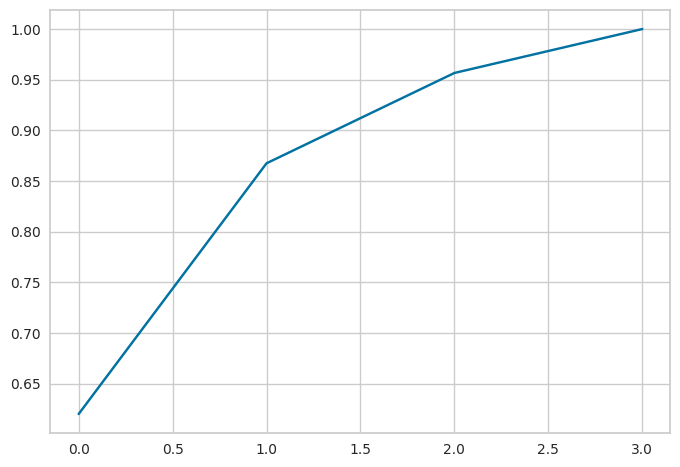

In [55]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))